# Exploratory Data Analysis of Web64 dataset

In [1]:
#importing libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import string
import seaborn as sns
import missingno as msno

In [2]:
#loading dataset
df = pd.read_csv('cop26_data.csv',index_col=0)
df.head(5)

,url,og_url,domain,title,description,content,entities,authors,paywall,fb_total,...,sentiment,word_count,is_homepage,is_document,http_code,feeds,cat_id,cat_score,outbound_link_ids,inbound_link_ids
id,,,,,,,,,,,,,,,,,,,,,
KQe1r321ZaJY,https://www.abcnyheter.no/nyheter/norge/2021/1...,https://www.abcnyheter.no/a/195798411/,www.abcnyheter.no,Færre vil møte klimakrisen med tiltak som i ko...,Andelen som vil ha like kraftige tiltak mot kl...,"Samtidig som klimatoppmøtet i Glasgow starter,...","['Glasgow', 'Fokus', 'Norge', 'Klimatoppmøtet'...",NaN,NaN,0,...,-0.071429,183,NaN,False,200,NaN,154.0,0.963856,NaN,NaN
jnegLMrLkawZ,https://www.ao.no/oslo-fergenes-siste-dag-pa-f...,https://www.ao.no/5-128-204411,www.ao.no,(+) Oslo-Fergenes siste dag på fjorden: – Det ...,Siden 1917 har Oslo-Fergene fraktet turister o...,"Øyene, Ferger | Oslo-Fergenes siste dag på fjo...",NaN,['Sevda Barazesh'],1.0,1,...,0.000000,0,NaN,False,200,NaN,NaN,NaN,NaN,['LDdwm7PORa1Y']
Jrb2vD34MbWL,https://www.abcnyheter.no/nyheter/verden/2021/...,https://www.abcnyheter.no/a/195798410/,www.abcnyheter.no,25 drept i raid mot bankrøvere i Brasil,25 antatte medlemmer av en bande bankrøvere bl...,50 politifolk deltok i operasjonen mot to gård...,"['bandemedlemmene', 'Rodolfo Morotti Fernandes...",NaN,NaN,0,...,-0.222222,131,NaN,False,200,NaN,65.0,1.000018,NaN,NaN
xkazKYRPqbJ0,https://norgeogverdensnytt.blogg.no/sandra-lyn...,NaN,norgeogverdensnytt.blogg.no,Sandra Lyng (34) har fått korona,AV/ NorgeOgVerdensNytt Foto: Mauricio E...,AV/ NorgeOgVerdensNytt Foto: Mauricio Evensen ...,"['Mauricio Evensen', 'Sandra Lyng', 'Lyngs', '...",['norgeogverdensnytt'],NaN,0,...,-0.250000,91,NaN,False,200,NaN,127.0,0.714142,NaN,NaN
Vyb86KpPrevA,https://www.vg.no/nyheter/utenriks/i/V959MJ/ab...,https://www.vg.no/i/V959MJ,www.vg.no,Aborttilgangen tørker inn – nå skal Texas-love...,MEMPHIS (VG) I sørstatene skyves nå kvinner fr...,FORBEREDELSER: Joy Evans er såkalt «patient ed...,"['Texas', 'Roe', 'Wade', 'Memphis', 'Webb', 'H...",NaN,NaN,0,...,-0.248000,973,NaN,False,200,NaN,168.0,0.683313,['nXe0VD5vNbxr'],['lNbW7oZOEbyg']


In [3]:
#checking each column
df.columns

Index(['url', 'og_url', 'domain', 'title', 'description', 'content',
       'entities', 'authors', 'paywall', 'fb_total', 'fb_comments',
       'fb_reactions', 'fb_shares', 'tweet_count', 'image', 'top_image',
       'lang', 'pub_date', 'rel_date', 'share_rate', 'tags', 'sentiment',
       'word_count', 'is_homepage', 'is_document', 'http_code', 'feeds',
       'cat_id', 'cat_score', 'outbound_link_ids', 'inbound_link_ids'],
      dtype='object')

## Exploratory Data Analysis
1. Check number of rows which are missing from each columns.
2. Check duplicated rows and discard it.
3. Check unique categories using the column 'tags'
4. Which category is most used by the authors in their publications
5. Check the frequency of the words count using the colunn 'count_word'
6. Individual analysis of each row of description (How many words it contains)
"

[Text(0.5, 1.0, 'Missing Data in Web64'), Text(0, 0.5, 'Number missing')]

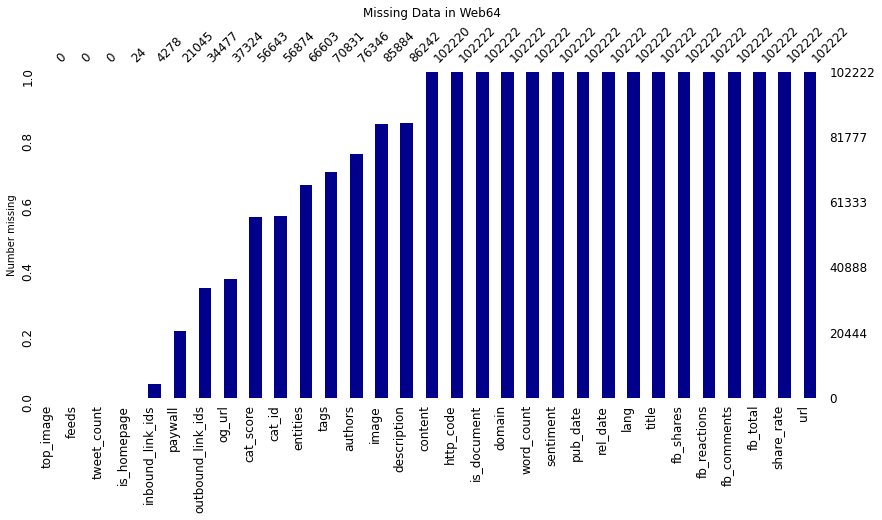

In [4]:
# Missing data 
fig, ax = plt.subplots(figsize=(14,6))
msno.bar(df, color="darkblue", fontsize=12,sort="ascending", ax=ax);
for tick in ax.get_xticklabels():
    tick.set_rotation(90)
for tick in ax.get_yticklabels():
    tick.set_rotation(90)    
ax.set(title='Missing Data in Web64',ylabel='Number missing')


In [6]:
# finding duplicates
df.drop_duplicates(keep='first',inplace=True)
print(df.shape)


(102221, 33)


In [19]:
# checking average of articles published in per day
print('Their are %d total articles in cop64 dataset. Average of %d per day.' % (df.shape[0], df.shape[0]/len(df.pub_day.unique())))
print('%d duplicate article' % df.duplicated().sum())

Their are 102222 total articles in cop64 dataset. Average of 7301 per day.
1 duplicate article


## Analyzing Feature "Domain"

In [21]:
# convert published date to datetime
date_format = '%Y-%m-%dT%H:%M:%S'

# make features for hour and day
df['pub_day'] = pd.to_datetime(df.pub_date, format=date_format).dt.date
df['pub_hour'] = pd.to_datetime(df.pub_date, format=date_format).dt.hour

2929 unique domains


[Text(0.5, 1.0, 'Top 20 publishers [2 week period]'),
 Text(0.5, 0, '# of articles')]

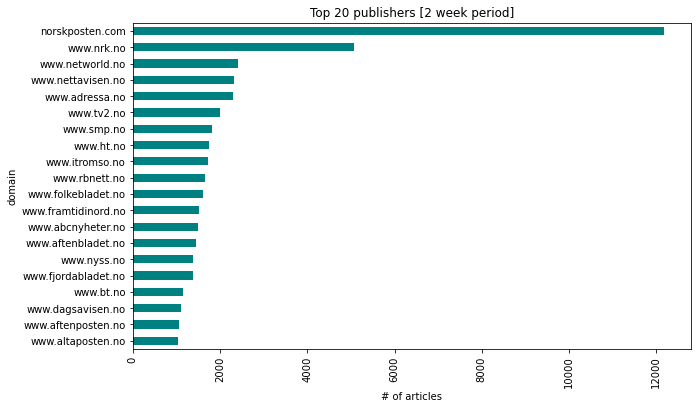

In [27]:
#Analyzing domains
print('%d unique domains' % df.domain.unique().shape)
f,ax=plt.subplots(figsize=(10,6))
df.groupby('domain').count().url.sort_values()[-20:].plot.barh(ax=ax,color='teal')
plt.xticks(rotation=90)
ax.set(title='Top 20 publishers [2 week period]', xlabel='# of articles')



In [28]:
# Droping unauthentic domains
df.drop(df.index[(df['domain'] == 'norskposten.com') | \
                 (df['domain'] == 'www.networld.no') | \
                 (df['domain'] == 'www.kunstveggen.no')], inplace=True)

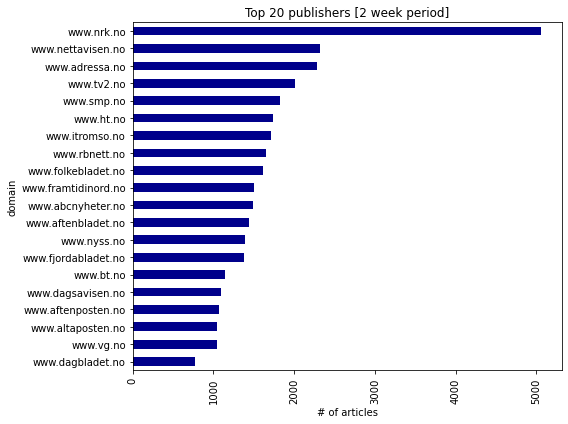

In [30]:
# new visualization after dropping useless domains

f,ax=plt.subplots(figsize=(8,6))
df.groupby('domain').count().url.sort_values()[-20:].plot.barh(ax=ax,color='darkblue')
plt.xticks(rotation=90)
ax.set(title='Top 20 publishers [2 week period]', xlabel='# of articles')



f.tight_layout()
plt.show()

In [11]:
#making a new dataset with changes
#df.to_csv('new_cop26_data.csv')

## Analyzing Feature "TAGS"

In [32]:
#Most used Categories by publishers
# convert strings to lists
df.tags = df.tags.apply(lambda x: eval(x) if type(x)==str else x)

# make lists of all the categories
cat_dict = {}
for val in df.tags.values:
    if (type(val)==list):
        for item in val:
            key = item.split(':')[1]
            if key in cat_dict.keys():
                cat_dict[key]+=1
            else:
                cat_dict[key]=1
        
cat_df = pd.Series(cat_dict)

[Text(0.5, 1.0, 'Most common categories'), Text(0.5, 0, 'Percent')]

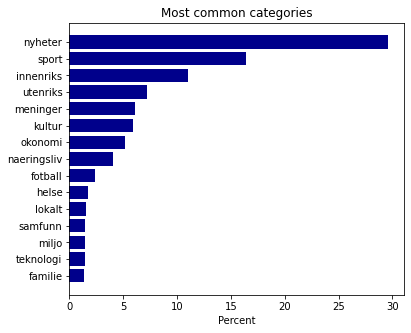

In [33]:
#plotting top used categories
f,ax=plt.subplots(figsize=(6,5))
to_plot = cat_df.sort_values()[-15:]
ax.barh(to_plot.index,100*to_plot.values/df.shape[0], color='darkblue')
ax.set(title='Most common categories', xlabel='Percent')

## Analyzing Feature "wordcount"

In [34]:
#Frequency of words in each column by using "word_count"
import cufflinks as cf
cf.go_offline()
print( cf.__version__)
df['word_count'].iplot(
    colors='blue',
    kind='hist',
    size='200',
    bins=500,
    xTitle='word count', 
    linecolor='black',
    yTitle='Frequency of words',
    title='Review Text Word Count Distribution')

0.17.3


### Analysis of 'authors'

Text(0.5, 1.0, 'Most prolific authors')

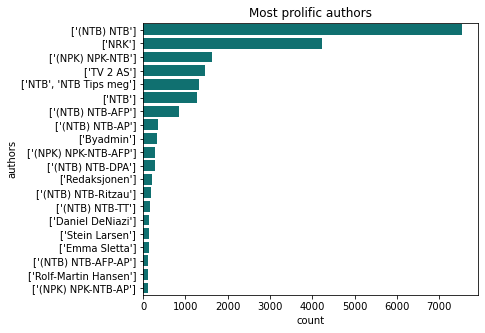

In [35]:
#top authors with most of the publishment in the dataset
f,ax=plt.subplots(figsize=(6,5))
sns.countplot(y=df.authors, order=df["authors"].value_counts().sort_values(ascending=False)[:20].index, color='teal')
plt.title('Most prolific authors')

## Analysis of 'description'

In [36]:
#Counting Words in each description
df["totalwords"] = df["description"].apply(lambda x: len(str(x).split(' ')))
print(df["totalwords"])

id
KQe1r321ZaJY    23
jnegLMrLkawZ    18
Jrb2vD34MbWL    20
xkazKYRPqbJ0    32
Vyb86KpPrevA    26
                ..
LDdwmx6pXa1Y    27
J0dN9G6R2bLO    17
K9b6RMAP7bEv    27
YQdJq19p2bOG     4
APdRoXvwqeGy     1
Name: totalwords, Length: 87069, dtype: int64


260 unique numbers for the length of the words
1 minimun length of words in a description column
1893 maximum length of words in a description column


Text(0.5, 1.0, 'Distribution of description length')

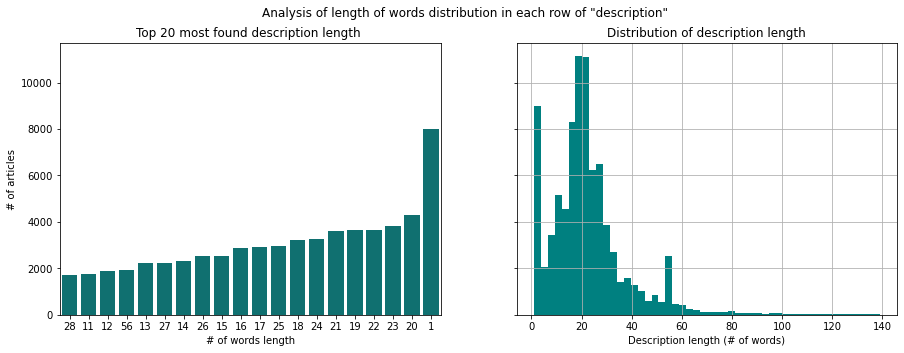

In [40]:
# making graph to check distribution of words in description
print('%d unique numbers for the length of the words' % df.totalwords.unique().shape)
print('%d minimun length of words in a description column' % df.totalwords.min())
print('%d maximum length of words in a description column' % df.totalwords.max())

fig, axes = plt.subplots(1,2, figsize=(15, 5), sharey=True)
fig.suptitle('Analysis of length of words distribution in each row of "description"')
sns.countplot(ax=axes[0], x=df["totalwords"],color='teal', data=df, order = df["totalwords"].value_counts().sort_values()[-20:].index ).set(title='Top 20 most found description length ', xlabel='# of words length', ylabel='# of articles')

ax=axes[1]=df.loc[df['totalwords']<140, 'totalwords'].hist(bins=50,color='teal')
plt.xlabel('Description length (# of words)')
plt.title('Distribution of description length')



<AxesSubplot:>

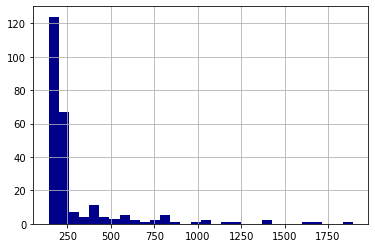

In [20]:
# check ouliers of decription length with more than 140 words
df.loc[df['totalwords']>140, 'totalwords'].hist(bins=30,color='darkblue')

In [21]:
#check how many rows has decription length = 1
rslt_df = df[df['totalwords'] == 1]
  
print('\nResult dataframe :\n', rslt_df)


Result dataframe :
                                                             url  \
id                                                                
J0dN9WVlmbLO  https://www.sokelys.com/vi-er-i-endetiden-jesu...   
xkazKY1M7bJ0  https://www.himmelkalenderen.com/2021/11/skriv...   
46dBL9xBQa79  https://nittedalil.no/tennis/2021/10/31/divisj...   
8mepQLNpNaMy                      https://www.tv2.no/v/1697378/   
4QbYvqjAKdzq  https://www.fvn.no/sport/i/a7KpaM/den-foerste-...   
...                                                         ...   
K9b6RMqMzbEv  https://hordalandsfotball.no/2021/11/oddstips-...   
nXe0VM7Bybxr       https://www.salangen-nyheter.com/?id=6421366   
lNbW71AmJbyg  http://tromsosjakk.no/gjensyn-med-sjakkspalta/...   
y1aKZGNKMeQG  http://baerumsk.no/g09-spilleglede-og-taco-suk...   
APdRoXvwqeGy  http://tromsosjakk.no/nettsjakk-lichess/norges...   

                                                         og_url  \
id                                      

## Analysis of Feature "title"

In [41]:
#discarding useless characters
spec_chars = ["!",'"',"#","%","&","'","(",")",
              "*","+",",","-",".","/",":",";","<",
              "=",">","?","@","[","\\","]","^","_",
              "`","{","|","}","~","–"]
for char in spec_chars:
    df['title'] = df['title'].astype(str).str.replace(char, ' ')
    
# change to lower case
df.title = df.title.str.lower()

# clean out extra spaces
title_words = df['title'].apply(lambda x: [word for word in x.split(' ') if word!=''])
df['title'] = title_words.str.join(' ')    

In [42]:
#counting words in the each title
df["titlewords"] = df["title"].apply(lambda x: len(str(x).split(' ')))
print(df["titlewords"])

id
KQe1r321ZaJY     9
jnegLMrLkawZ    10
Jrb2vD34MbWL     8
xkazKYRPqbJ0     6
Vyb86KpPrevA    10
                ..
LDdwmx6pXa1Y     3
J0dN9G6R2bLO     8
K9b6RMAP7bEv     3
YQdJq19p2bOG     8
APdRoXvwqeGy    14
Name: titlewords, Length: 87069, dtype: int64


44 unique numbers for the length of the words
1 minimun length of words in a description column
158 maximum length of words in a description column


Text(0.5, 1.0, 'Review Text Word Count Distribution of title')

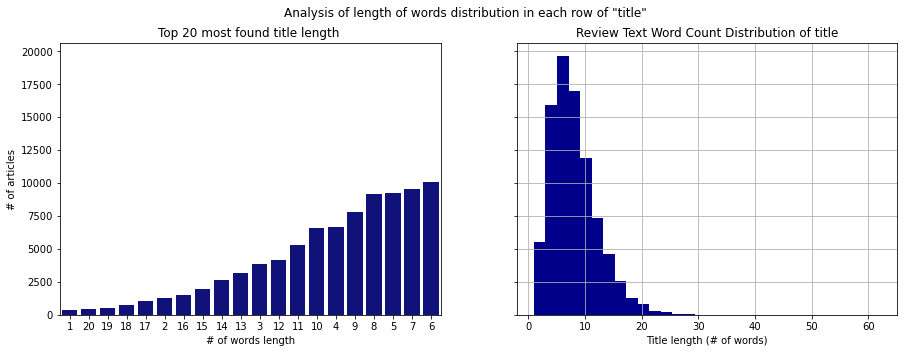

In [44]:
#making graph to check distribution of words in description
print('%d unique numbers for the length of the words' % df.titlewords.unique().shape)
print('%d minimun length of words in a description column' % df.titlewords.min())
print('%d maximum length of words in a description column' % df.titlewords.max())

fig, ax = plt.subplots(1,2, figsize=(15, 5), sharey=True)
fig.suptitle('Analysis of length of words distribution in each row of "title"')
sns.countplot(ax=ax[0], x=df["titlewords"], color='darkblue', data=df, order = df["titlewords"].value_counts().sort_values()[-20:].index ).set(title='Top 20 most found title length ', xlabel='# of words length', ylabel='# of articles')

ax[1]=df.loc[df['titlewords']<100, 'titlewords'].hist(bins=30, color='darkblue')
plt.xlabel('Title length (# of words)')
plt.title('Review Text Word Count Distribution of title')



In [45]:
#checking titles with one word
rslt_df = df[df['titlewords'] == 1]
  
print('\nResult dataframe :\n', rslt_df)


Result dataframe :
                                                             url  \
id                                                                
4oeE9WJxNe0B  https://www.ba.no/drotningsvikveien/v/5-8-1733426   
N1aMQWR9QaWm         https://www.ba.no/brakeveien/v/5-8-1733420   
JxboQX3NXegw  https://www.andalsnes-avis.no/nyheter/2021/10/...   
LDdwm7X5Xa1Y          https://leneetarnes.blogg.no/suksess.html   
LDdwmgEqza1Y        https://leneelisabeth.blogg.no/suksess.html   
...                                                         ...   
zPdyrznxzeQr       https://bygdavar.com/2021/11/13/stedsnavn-2/   
pnel50PmJaKB   https://www.vg.no/sport/i/k6KMWX/manndomsproeven   
MvbmQkPMrbYA  https://www.nrk.no/trondelag/ruskjoring-1.1572...   
openrlPpWe7A               https://www.foross.no/livet/latskap/   
xkazKAop2bJ0  https://www.lofot-tidende.no/tilbakeblikk/g/5-...   

                                                og_url  \
id                                               